<a href="https://colab.research.google.com/github/RubanZ/ppa-for-da/blob/master/students/%D0%A0%D0%B0%D0%BC%D0%B8%D1%80%D0%BE%20%D0%92%D0%B8%D1%81%D0%B5%D0%BD%D1%82%D0%B5/AutoML_H2O_RamiroVicente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Автоматическое машинное обучение

Автоматическое машинное обучение (AutoML) 
процесс автоматизации сквозного процесса применения машинного обучения к задачам реального мира. В типичном приложении машинного обучения пользователь должен применить подходящие методы предварительной обработки данных, конструирования признаков, выделения признаков и выбора признаков, которые делают набор данных пригодным для обучения машин. После этих шагов работник должен осуществить выбор алгоритмаи оптимизацию гиперпараметров для максимизации прогнозируемой производительности конечной модели. Поскольку многие из этих шагов не могут осуществить люди, не будучи экспертами, был предложен подход AutoML как основанное на искусственном интеллекте решение для всё возрастающей необходимости применения машинного обучения. Автоматизация сквозного процесса применения машинного обучения даёт преимущество получения более простых решений, более быстрого создания таких решений и моделей, которые часто превосходят модели, построенные вручную.

Автоматическое машинное обучение может иметь целью различные стадии процесса:

автоматическая подготовка данных и сбор и сохранение данных (из сырых данных и разнообразных форматов):
автоматическое определение типа столбца, например, булевские данные, дискретные численные данные, непрерывные числовые значения или текст;
автоматическое определение смысла столбца; например, цель, метка, поле районирования, числовой признак, текстовая категория или свободный текст;
автоматическое обнаружение задач, например, двоичная классификация, регрессия, выделение кластеров или ранжирование;
автоматическое конструирование признаков:
выбор признаков
выделение признаков
метаобучение и перенос обучения
обнаружение и обработка асимметричных данных или отсутствующих значений;
автоматический выбор модели;
оптимизация гиперпараметров алгоритма обучения и характеризации;
автоматический выбор каналов по времени, памяти и ограничений сложности;
автоматический выбор метрик оценки и процедур валидации;
автоматическая проверка задач:
определение утечки;
определение ошибок в конфигурации;
автоматический анализ полученных результатов;
пользовательские результаты и визуализация для автоматического обучения машин

##Аспекты AutoML

Импутация, горячее кодирование, стандартизация
Выбор признаков и / или извлечение признаков (например, PCA)
Целевое количество / тег / кодирование категориальных функций
 

Поиск по декартовой сетке или поиск по случайной сетке
Оптимизация байесовских гиперпараметров
Индивидуальные модели можно настроить с помощью набора для проверки.
 

Наборы часто превосходят отдельные модели
Укладка / Суперобучение (Вольперт, Брейман)
Подбор ансамбля (Каруана)




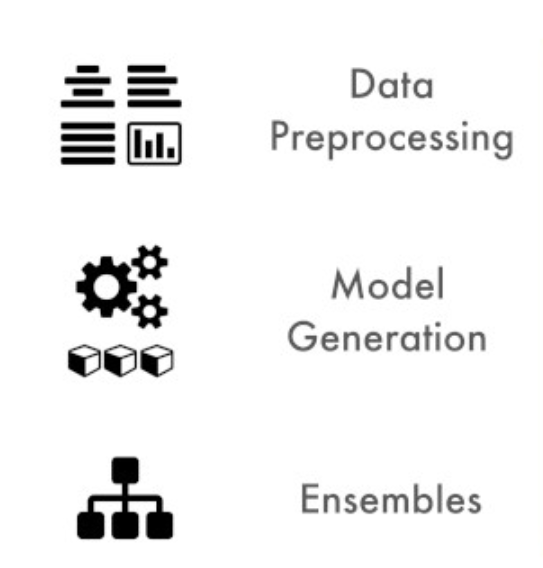

##H2O AutoML
[H2O](https://www.h2o.ai) - это распределенная, быстрая и масштабируемая платформа машинного обучения и прогнозной аналитики с открытым исходным кодом, которая позволяет создавать модели машинного обучения на основе больших данных и обеспечивает простую производственную реализацию этих моделей в корпоративной среде. Это библиотека содержит в себе все популярные модули обработки данных и машинного обучения в том числе и AutoML.

Функция автоматического машинного обучения (AutoML) автоматизирует процесс обучения модели машинного обучения с учителем. 
Текущая версия AutoML обучает и перекрестно проверяет следующие алгоритмы: 
- три предварительно заданные модели XGBoost GBM (Gradient Boosting Machine);
- одна фиксированная сетка GLM, один случайный лес по умолчанию (DRF);
- пять предварительно заданных GBM H2O;
- одна глубокая нейронная сеть. 

AutoML обучает несколько составных моделей сборок во время выполнения. Обучаются два типа составных моделей множеств: одна из всех доступных моделей и одна из лучших моделей каждого типа.

##Тематическое исследование

Есть база клиентов ресторана, где они идентифицируются по ID, анализ будет проводиться по десяти моделям,
Будет создана распределенная случайная модель, а линейная модель, в свою очередь, будет использоваться для обучения Automl H2O, чтобы найти наиболее подходящую модель и сэкономить время по сравнению с другими методами.

Он проанализирует важность переменных для анализа Automl H2O.

H2O основан на Java, поэтому нам необходимо установить JRE. 

In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


Установка H2O

In [2]:
!pip install h2o

     ,████████████████████████████████, 175.8 MB 30 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=61a71346b4aaab5ea32d8569f932b31c946f483e4248b3a31041c6d670ad04cd
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


###Инициализация модулей и импорт данных

In [3]:
 import h2o

Инициализируем H2O сервер

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpv6p_ng16
  JVM stdout: /tmp/tmpv6p_ng16/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpv6p_ng16/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_unknownUser_wram02
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
from h2o.automl import H2OAutoML

Импоорт данных

In [6]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: ,████████████████████████████████████████████████████████████████, (done) 100%


In [7]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [8]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Разделение выборки

In [9]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [10]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes


In [11]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

###Тренеровка модели

In [12]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

**exclude_algos** - Этот параметр позволяет указать список алгоритмов, которые не следует включать в выполнение AutoML на этапе построения модели. По умолчанию для этого параметра установлено значение None / Null, что означает, что включены все алгоритмы.

**nfolds** - число итераций кросс-валидации

Тренеровка модели

In [13]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: ,
17:21:25.85: Project: AutoML_1_20211124_172125
17:21:25.86: Cross-validation disabled by user: no fold column nor nfolds > 1.
17:21:25.111: Setting stopping tolerance adaptively based on the training frame: 0.014245072057454743
17:21:25.111: Build control seed: 10
17:21:25.111: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
17:21:25.210: training frame: Frame key: AutoML_1_20211124_172125_training_py_2_sid_af2e    cols: 21    rows: 4456  chunks: 8    size: 295011  checksum: 8408697942189365032
17:21:25.210: validation frame: Frame key: py_4_sid_af2e    cols: 21    rows: 1054  chunks: 8    size: 138861  checksum: -6086075216919481633
17:21:25.217: leaderboard frame: Frame key: AutoML_1_20211124_172125_leaderboard_py_2_sid_af2e    cols: 21    rows: 472  chunks: 8    size: 124254  checksum: 8310682792775901743
17:21:25.217: blending frame: NULL
17:21

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,40.0,40.0,15879.0,6.0,11.0,8.125,24.0,30.0,26.8




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11948181059073167
RMSE: 0.34566141032914227
LogLoss: 0.37166715173328435
Mean Per-Class Error: 0.19057084090426946
AUC: 0.8865153811703771
AUCPR: 0.7369611310343265
Gini: 0.7730307623407542

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3277004828869954: 


,,No,Yes,Error,Rate
0,No,2649.0,609.0,0.1869,(609.0/3258.0)
1,Yes,242.0,956.0,0.202,(242.0/1198.0)
2,Total,2891.0,1565.0,0.191,(851.0/4456.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.327700,0.692001,215.0
1,max f2,0.192999,0.787077,277.0
2,max f0point5,0.546542,0.683723,125.0
3,max accuracy,0.460180,0.825404,162.0
4,max precision,0.903904,1.000000,0.0
5,max recall,0.031473,1.000000,378.0
6,max specificity,0.903904,1.000000,0.0
7,max absolute_mcc,0.365768,0.567585,199.0
8,max min_per_class_accuracy,0.322460,0.804674,218.0
9,max mean_per_class_accuracy,0.273074,0.809429,241.0



Gains/Lift Table: Avg response rate: 26.89 %, avg score: 26.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010099,0.844580,3.636876,3.636876,0.977778,0.867375,0.977778,0.867375,0.036728,0.036728,263.687628,263.687628,0.036421
1,2,0.020197,0.820908,3.306251,3.471564,0.888889,0.834581,0.933333,0.850978,0.033389,0.070117,230.625116,247.156372,0.068275
2,3,0.030072,0.798151,3.550463,3.497471,0.954545,0.807901,0.940299,0.836833,0.035058,0.105175,255.046289,249.747091,0.102720
3,4,0.040171,0.778077,3.140939,3.407840,0.844444,0.788751,0.916201,0.824746,0.031720,0.136895,214.093860,240.783988,0.132291
4,5,0.050045,0.759752,3.212324,3.369263,0.863636,0.769623,0.905830,0.813869,0.031720,0.168614,221.232357,236.926267,0.162169
5,6,0.100090,0.678378,2.852198,3.110730,0.766816,0.716373,0.836323,0.765121,0.142738,0.311352,185.219761,211.073014,0.288946
6,7,0.150135,0.604530,2.435210,2.885557,0.654709,0.641226,0.775785,0.723823,0.121870,0.433222,143.520965,188.555665,0.387182
7,8,0.200180,0.524722,2.118299,2.693742,0.569507,0.565089,0.724215,0.684139,0.106010,0.539232,111.829881,169.374219,0.463726
8,9,0.300045,0.385323,1.805436,2.398083,0.485393,0.458315,0.644727,0.608977,0.180301,0.719533,80.543603,139.808307,0.573738
9,10,0.400135,0.274107,1.309342,2.125745,0.352018,0.329094,0.571509,0.538967,0.131052,0.850584,30.934218,112.574519,0.616085




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.1335010904957389
RMSE: 0.36537801041625223
LogLoss: 0.4137410899029602
Mean Per-Class Error: 0.22679206438330524
AUC: 0.8440997566909976
AUCPR: 0.6721735634976599
Gini: 0.6881995133819951

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24161542748396217: 


,,No,Yes,Error,Rate
0,No,579.0,201.0,0.2577,(201.0/780.0)
1,Yes,55.0,219.0,0.2007,(55.0/274.0)
2,Total,634.0,420.0,0.2429,(256.0/1054.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.241615,0.631124,236.0
1,max f2,0.132178,0.743777,293.0
2,max f0point5,0.529469,0.645631,114.0
3,max accuracy,0.529469,0.813093,114.0
4,max precision,0.881836,1.000000,0.0
5,max recall,0.022315,1.000000,387.0
6,max specificity,0.881836,1.000000,0.0
7,max absolute_mcc,0.241615,0.485193,236.0
8,max min_per_class_accuracy,0.259112,0.755474,225.0
9,max mean_per_class_accuracy,0.213645,0.773208,249.0



Gains/Lift Table: Avg response rate: 26.00 %, avg score: 24.98 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010436,0.836845,3.846715,3.846715,1.000000,0.851147,1.000000,0.851147,0.040146,0.040146,284.671533,284.671533,0.040146
1,2,0.020873,0.809720,2.797611,3.322163,0.727273,0.822298,0.863636,0.836722,0.029197,0.069343,179.761115,232.216324,0.065497
2,3,0.030361,0.798106,3.462044,3.365876,0.900000,0.804509,0.875000,0.826656,0.032847,0.102190,246.204380,236.587591,0.097062
3,4,0.040797,0.773231,3.846715,3.488881,1.000000,0.786571,0.906977,0.816402,0.040146,0.142336,284.671533,248.888134,0.137208
4,5,0.050285,0.739830,3.077372,3.411238,0.800000,0.757820,0.886792,0.805348,0.029197,0.171533,207.737226,241.123812,0.163841
5,6,0.100569,0.660417,2.612863,3.012051,0.679245,0.701033,0.783019,0.753191,0.131387,0.302920,161.286324,201.205068,0.273433
6,7,0.149905,0.574174,2.145284,2.726786,0.557692,0.617591,0.708861,0.708563,0.105839,0.408759,114.528355,172.678555,0.349785
7,8,0.200190,0.509898,2.249966,2.607016,0.584906,0.539492,0.677725,0.666095,0.113139,0.521898,124.996557,160.701560,0.434718
8,9,0.299810,0.349987,1.392145,2.203340,0.361905,0.416357,0.572785,0.583113,0.138686,0.660584,39.214460,120.334011,0.487507
9,10,0.400380,0.237384,1.379011,1.996281,0.358491,0.290038,0.518957,0.509497,0.138686,0.799270,37.901116,99.628118,0.539014




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-24 17:21:32,0.029 sec,0.0,0.443362,0.582113,0.500000,0.268851,1.000000,0.731149,0.438704,0.573220,0.500000,0.259962,1.000000,0.740038
1,,2021-11-24 17:21:33,0.794 sec,5.0,0.394550,0.481024,0.862057,0.675139,3.067936,0.212074,0.393920,0.480402,0.844624,0.671907,3.846715,0.217268
2,,2021-11-24 17:21:33,1.254 sec,10.0,0.373040,0.436771,0.866652,0.690769,3.388907,0.214542,0.374933,0.440738,0.847069,0.680623,3.846715,0.220114
3,,2021-11-24 17:21:34,1.642 sec,15.0,0.362614,0.412840,0.870621,0.703875,3.554220,0.204219,0.367471,0.422461,0.849221,0.682032,3.846715,0.215370
4,,2021-11-24 17:21:34,1.975 sec,20.0,0.357034,0.398828,0.873839,0.711152,3.516649,0.190530,0.364937,0.414956,0.847796,0.681672,3.846715,0.230550
5,,2021-11-24 17:21:34,2.285 sec,25.0,0.353383,0.389689,0.877368,0.716552,3.487062,0.201302,0.364301,0.412522,0.847026,0.679736,3.846715,0.219165
6,,2021-11-24 17:21:35,2.764 sec,30.0,0.350645,0.382935,0.880327,0.722879,3.554220,0.198833,0.364290,0.412211,0.845737,0.679415,3.846715,0.217268
7,,2021-11-24 17:21:35,3.155 sec,35.0,0.348049,0.376893,0.883370,0.730400,3.636876,0.195467,0.364571,0.412331,0.844947,0.677116,3.846715,0.240987
8,,2021-11-24 17:21:35,3.370 sec,40.0,0.345661,0.371667,0.886515,0.736961,3.636876,0.190978,0.365378,0.413741,0.844100,0.672174,3.846715,0.242884



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract,545.339600,1.000000,0.324614
1,OnlineSecurity,217.282440,0.398435,0.129338
2,tenure,211.621475,0.388054,0.125968
3,TotalCharges,165.868073,0.304156,0.098733
4,MonthlyCharges,147.609055,0.270674,0.087864
5,InternetService,145.670685,0.267119,0.086711
6,PaymentMethod,47.305019,0.086744,0.028158
7,TechSupport,36.778606,0.067442,0.021892
8,OnlineBackup,29.643963,0.054359,0.017646
9,PaperlessBilling,22.364889,0.041011,0.013313


Получение результатов оценки моделей

In [14]:
lb = aml.leaderboard

In [15]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20211124_172125,0.864046,0.386228,0.689423,0.212548,0.352044,0.123935
GLM_1_AutoML_1_20211124_172125,0.863463,0.390597,0.662004,0.204383,0.354421,0.125614
GBM_2_AutoML_1_20211124_172125,0.863118,0.38685,0.690755,0.211084,0.351598,0.123621
XGBoost_2_AutoML_1_20211124_172125,0.85287,0.402217,0.678626,0.236104,0.359252,0.129062
XGBoost_3_AutoML_1_20211124_172125,0.852191,0.399371,0.672541,0.225105,0.35797,0.128143
GBM_3_AutoML_1_20211124_172125,0.851441,0.402382,0.662099,0.231759,0.35853,0.128544
XRT_1_AutoML_1_20211124_172125,0.851287,0.405678,0.669549,0.232045,0.360558,0.130002
GBM_4_AutoML_1_20211124_172125,0.849013,0.405413,0.667513,0.230723,0.360414,0.129899
XGBoost_1_AutoML_1_20211124_172125,0.845919,0.411778,0.64837,0.24196,0.364375,0.132769
DRF_1_AutoML_1_20211124_172125,0.843205,0.481403,0.634514,0.229164,0.364301,0.132715


Расчет предикторов на тестовой выборке

In [16]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: ,███████████████████████████████████████████████████████, (done) 100%


In [17]:
churn_pred.head()

predict,No,Yes
No,0.874356,0.125644
No,0.964513,0.0354867
Yes,0.379683,0.620317
Yes,0.159372,0.840628
Yes,0.325596,0.674404
No,0.931593,0.0684072
Yes,0.692011,0.307989
No,0.97722,0.0227801
No,0.97292,0.0270803
No,0.796982,0.203018


Оценка модели

In [18]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1415519181304584
RMSE: 0.3762338609567969
LogLoss: 0.4330851835279904
Mean Per-Class Error: 0.2516974925806481
AUC: 0.8283970524729642
AUCPR: 0.635742356013193
Gini: 0.6567941049459285

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29726576285691864: 


,,No,Yes,Error,Rate
0,No,586.0,197.0,0.2516,(197.0/783.0)
1,Yes,70.0,208.0,0.2518,(70.0/278.0)
2,Total,656.0,405.0,0.2516,(267.0/1061.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.297266,0.609078,220.0
1,max f2,0.071801,0.739106,337.0
2,max f0point5,0.549850,0.623791,112.0
3,max accuracy,0.549850,0.803016,112.0
4,max precision,0.893582,1.000000,0.0
5,max recall,0.012081,1.000000,399.0
6,max specificity,0.893582,1.000000,0.0
7,max absolute_mcc,0.423918,0.456128,164.0
8,max min_per_class_accuracy,0.297266,0.748201,220.0
9,max mean_per_class_accuracy,0.297266,0.748303,220.0



Gains/Lift Table: Avg response rate: 26.20 %, avg score: 26.64 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010368,0.842702,3.122629,3.122629,0.818182,0.858798,0.818182,0.858798,0.032374,0.032374,212.262917,212.262917,0.029820
1,2,0.020735,0.820218,3.816547,3.469588,1.000000,0.829395,0.909091,0.844096,0.039568,0.071942,281.654676,246.958797,0.069388
2,3,0.030160,0.799918,3.434892,3.458746,0.900000,0.810519,0.906250,0.833603,0.032374,0.104317,243.489209,245.874550,0.100485
3,4,0.040528,0.775524,2.775670,3.284005,0.727273,0.787372,0.860465,0.821777,0.028777,0.133094,177.567037,228.400535,0.125431
4,5,0.050895,0.741074,2.081753,3.039102,0.545455,0.758159,0.796296,0.808818,0.021583,0.154676,108.175278,203.910205,0.140628
5,6,0.100848,0.657391,2.592371,2.817824,0.679245,0.704132,0.738318,0.756964,0.129496,0.284173,159.237139,181.782425,0.248413
6,7,0.150801,0.596810,2.304330,2.647729,0.603774,0.626754,0.693750,0.713832,0.115108,0.399281,130.433012,164.772932,0.336701
7,8,0.200754,0.525536,1.944279,2.472692,0.509434,0.554744,0.647887,0.674246,0.097122,0.496403,94.427854,147.269227,0.400617
8,9,0.300660,0.388970,1.404201,2.117645,0.367925,0.454666,0.554859,0.601282,0.140288,0.636691,40.420117,111.764507,0.455337
9,10,0.400566,0.272796,1.260181,1.903783,0.330189,0.328583,0.498824,0.533268,0.125899,0.762590,26.018053,90.378333,0.490559


In [19]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_1_20211124_172125


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0893819428761671
RMSE: 0.29896813020147667
LogLoss: 0.29093892904209145
Mean Per-Class Error: 0.1322677144534936
AUC: 0.9381305910915574
AUCPR: 0.8582169088048139
Gini: 0.8762611821831148

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3827959682260241: 


,,No,Yes,Error,Rate
0,No,2905.0,353.0,0.1083,(353.0/3258.0)
1,Yes,208.0,990.0,0.1736,(208.0/1198.0)
2,Total,3113.0,1343.0,0.1259,(561.0/4456.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.382796,0.779221,200.0
1,max f2,0.263709,0.839478,248.0
2,max f0point5,0.559281,0.800333,137.0
3,max accuracy,0.514552,0.876795,153.0
4,max precision,0.979680,1.000000,0.0
5,max recall,0.014001,1.000000,384.0
6,max specificity,0.979680,1.000000,0.0
7,max absolute_mcc,0.382796,0.693774,200.0
8,max min_per_class_accuracy,0.337919,0.863105,217.0
9,max mean_per_class_accuracy,0.311365,0.867732,228.0



Gains/Lift Table: Avg response rate: 26.89 %, avg score: 26.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010099,0.929997,3.719533,3.719533,1.000000,0.950996,1.000000,0.950996,0.037563,0.037563,271.953255,271.953255,0.037563
1,2,0.020197,0.909596,3.719533,3.719533,1.000000,0.918878,1.000000,0.934937,0.037563,0.075125,271.953255,271.953255,0.075125
2,3,0.030072,0.889756,3.634998,3.691775,0.977273,0.900681,0.992537,0.923689,0.035893,0.111018,263.499772,269.177485,0.110711
3,4,0.040171,0.861279,3.719533,3.698753,1.000000,0.875648,0.994413,0.911612,0.037563,0.148581,271.953255,269.875304,0.148274
4,5,0.050045,0.840835,3.465928,3.652814,0.931818,0.851797,0.982063,0.899810,0.034224,0.182805,246.592806,265.281448,0.181577
5,6,0.100090,0.749228,3.385942,3.519378,0.910314,0.793635,0.946188,0.846723,0.169449,0.352254,238.594219,251.937834,0.344887
6,7,0.150808,0.649948,2.929543,3.321011,0.787611,0.698892,0.892857,0.797006,0.148581,0.500835,192.954334,232.101121,0.478735
7,8,0.200180,0.559710,2.755835,3.181618,0.740909,0.602114,0.855381,0.748938,0.136060,0.636895,175.583548,218.161809,0.597300
8,9,0.300045,0.384013,1.863946,2.743051,0.501124,0.473010,0.737472,0.657100,0.186144,0.823038,86.394553,174.305093,0.715304
9,10,0.400135,0.245017,0.959072,2.296806,0.257848,0.310829,0.617499,0.570483,0.095993,0.919032,-4.092770,129.680614,0.709701




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.14257344938620511
RMSE: 0.377588995319256
LogLoss: 0.44442915565404556
Mean Per-Class Error: 0.23640744899868982
AUC: 0.8296064944787572
AUCPR: 0.6154376363977327
Gini: 0.6592129889575145

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17067734897136688: 


,,No,Yes,Error,Rate
0,No,545.0,235.0,0.3013,(235.0/780.0)
1,Yes,47.0,227.0,0.1715,(47.0/274.0)
2,Total,592.0,462.0,0.2676,(282.0/1054.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.170677,0.616848,268.0
1,max f2,0.063796,0.739884,334.0
2,max f0point5,0.528562,0.634648,138.0
3,max accuracy,0.528562,0.809298,138.0
4,max precision,0.931136,0.888889,6.0
5,max recall,0.007989,1.000000,389.0
6,max specificity,0.963585,0.998718,0.0
7,max absolute_mcc,0.483290,0.479859,152.0
8,max min_per_class_accuracy,0.237061,0.741026,237.0
9,max mean_per_class_accuracy,0.170677,0.763593,268.0



Gains/Lift Table: Avg response rate: 26.00 %, avg score: 25.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010436,0.923172,3.147313,3.147313,0.818182,0.943331,0.818182,0.943331,0.032847,0.032847,214.731254,214.731254,0.030283
1,2,0.020873,0.888174,3.147313,3.147313,0.818182,0.904876,0.818182,0.924104,0.032847,0.065693,214.731254,214.731254,0.060565
2,3,0.030361,0.871323,3.077372,3.125456,0.800000,0.880755,0.812500,0.910557,0.029197,0.094891,207.737226,212.545620,0.087198
3,4,0.040797,0.829383,2.098208,2.862672,0.545455,0.851159,0.744186,0.895362,0.021898,0.116788,109.820836,186.267187,0.102686
4,5,0.050285,0.813584,2.692701,2.830602,0.700000,0.821327,0.735849,0.881393,0.025547,0.142336,169.270073,183.060185,0.124387
5,6,0.100569,0.728846,2.758022,2.794312,0.716981,0.765546,0.726415,0.823470,0.138686,0.281022,175.802231,179.431208,0.243842
6,7,0.149905,0.627501,2.441185,2.678093,0.634615,0.681006,0.696203,0.776583,0.120438,0.401460,144.118473,167.809295,0.339921
7,8,0.200190,0.551065,2.177386,2.552323,0.566038,0.589276,0.663507,0.729534,0.109489,0.510949,117.738603,155.232297,0.419923
8,9,0.299810,0.363352,1.282238,2.130301,0.333333,0.448294,0.553797,0.636084,0.127737,0.638686,28.223844,113.030121,0.457917
9,10,0.400380,0.220010,1.342721,1.932473,0.349057,0.287756,0.502370,0.548589,0.135036,0.773723,34.272139,93.247310,0.504492




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-24 17:21:36,0.004 sec,0.0,0.500000,0.693147,0.500000,0.268851,1.000000,0.731149,0.500000,0.693147,0.500000,0.259962,1.000000,0.740038
1,,2021-11-24 17:21:36,0.179 sec,5.0,0.353920,0.407181,0.887453,0.745634,3.719533,0.186041,0.375912,0.444391,0.833291,0.617381,3.147313,0.200190
2,,2021-11-24 17:21:36,0.353 sec,10.0,0.333966,0.356184,0.901276,0.775964,3.719533,0.175494,0.373232,0.428470,0.835844,0.607926,3.497014,0.219165
3,,2021-11-24 17:21:37,0.604 sec,15.0,0.325054,0.336379,0.910603,0.794923,3.719533,0.153725,0.373324,0.430560,0.834732,0.633962,3.526156,0.203985
4,,2021-11-24 17:21:37,0.831 sec,20.0,0.315988,0.319786,0.920641,0.817738,3.719533,0.140934,0.372350,0.432332,0.835203,0.627883,3.147313,0.225806
5,,2021-11-24 17:21:37,1.027 sec,25.0,0.306526,0.303594,0.930474,0.839506,3.636876,0.132855,0.376049,0.441664,0.830921,0.617862,3.497014,0.227704
6,,2021-11-24 17:21:37,1.206 sec,30.0,0.298968,0.290939,0.938131,0.858217,3.719533,0.125898,0.377589,0.444429,0.829606,0.615438,3.147313,0.267552



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TotalCharges,804.760071,1.000000,0.183628
1,MonthlyCharges,748.631653,0.930254,0.170821
2,Contract.Month-to-month,693.546875,0.861806,0.158252
3,tenure,524.171997,0.651339,0.119604
4,OnlineSecurity.No,153.933029,0.191278,0.035124
5,TechSupport.No,137.605637,0.170990,0.031399
6,Contract.Two year,126.842651,0.157615,0.028943
7,InternetService.Fiber optic,103.279594,0.128336,0.023566
8,InternetService.DSL,88.520264,0.109996,0.020198
9,SeniorCitizen,88.097107,0.109470,0.020102



See the whole table with table.as_data_frame()


In [20]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [21]:
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'gpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [22]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 10,
  'min_child_weight': 5.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 13,
  'silent': True,
  'subsample': 0.6,
  'updater': 'grow_gpu_hist'},
 10000)

Вывод отчета

In [23]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_1_20211124_172125


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0893819428761671
RMSE: 0.29896813020147667
LogLoss: 0.29093892904209145
Mean Per-Class Error: 0.1322677144534936
AUC: 0.9381305910915574
AUCPR: 0.8582169088048139
Gini: 0.8762611821831148

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3827959682260241: 


,,No,Yes,Error,Rate
0,No,2905.0,353.0,0.1083,(353.0/3258.0)
1,Yes,208.0,990.0,0.1736,(208.0/1198.0)
2,Total,3113.0,1343.0,0.1259,(561.0/4456.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.382796,0.779221,200.0
1,max f2,0.263709,0.839478,248.0
2,max f0point5,0.559281,0.800333,137.0
3,max accuracy,0.514552,0.876795,153.0
4,max precision,0.979680,1.000000,0.0
5,max recall,0.014001,1.000000,384.0
6,max specificity,0.979680,1.000000,0.0
7,max absolute_mcc,0.382796,0.693774,200.0
8,max min_per_class_accuracy,0.337919,0.863105,217.0
9,max mean_per_class_accuracy,0.311365,0.867732,228.0



Gains/Lift Table: Avg response rate: 26.89 %, avg score: 26.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010099,0.929997,3.719533,3.719533,1.000000,0.950996,1.000000,0.950996,0.037563,0.037563,271.953255,271.953255,0.037563
1,2,0.020197,0.909596,3.719533,3.719533,1.000000,0.918878,1.000000,0.934937,0.037563,0.075125,271.953255,271.953255,0.075125
2,3,0.030072,0.889756,3.634998,3.691775,0.977273,0.900681,0.992537,0.923689,0.035893,0.111018,263.499772,269.177485,0.110711
3,4,0.040171,0.861279,3.719533,3.698753,1.000000,0.875648,0.994413,0.911612,0.037563,0.148581,271.953255,269.875304,0.148274
4,5,0.050045,0.840835,3.465928,3.652814,0.931818,0.851797,0.982063,0.899810,0.034224,0.182805,246.592806,265.281448,0.181577
5,6,0.100090,0.749228,3.385942,3.519378,0.910314,0.793635,0.946188,0.846723,0.169449,0.352254,238.594219,251.937834,0.344887
6,7,0.150808,0.649948,2.929543,3.321011,0.787611,0.698892,0.892857,0.797006,0.148581,0.500835,192.954334,232.101121,0.478735
7,8,0.200180,0.559710,2.755835,3.181618,0.740909,0.602114,0.855381,0.748938,0.136060,0.636895,175.583548,218.161809,0.597300
8,9,0.300045,0.384013,1.863946,2.743051,0.501124,0.473010,0.737472,0.657100,0.186144,0.823038,86.394553,174.305093,0.715304
9,10,0.400135,0.245017,0.959072,2.296806,0.257848,0.310829,0.617499,0.570483,0.095993,0.919032,-4.092770,129.680614,0.709701




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.14257344938620511
RMSE: 0.377588995319256
LogLoss: 0.44442915565404556
Mean Per-Class Error: 0.23640744899868982
AUC: 0.8296064944787572
AUCPR: 0.6154376363977327
Gini: 0.6592129889575145

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17067734897136688: 


,,No,Yes,Error,Rate
0,No,545.0,235.0,0.3013,(235.0/780.0)
1,Yes,47.0,227.0,0.1715,(47.0/274.0)
2,Total,592.0,462.0,0.2676,(282.0/1054.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.170677,0.616848,268.0
1,max f2,0.063796,0.739884,334.0
2,max f0point5,0.528562,0.634648,138.0
3,max accuracy,0.528562,0.809298,138.0
4,max precision,0.931136,0.888889,6.0
5,max recall,0.007989,1.000000,389.0
6,max specificity,0.963585,0.998718,0.0
7,max absolute_mcc,0.483290,0.479859,152.0
8,max min_per_class_accuracy,0.237061,0.741026,237.0
9,max mean_per_class_accuracy,0.170677,0.763593,268.0



Gains/Lift Table: Avg response rate: 26.00 %, avg score: 25.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010436,0.923172,3.147313,3.147313,0.818182,0.943331,0.818182,0.943331,0.032847,0.032847,214.731254,214.731254,0.030283
1,2,0.020873,0.888174,3.147313,3.147313,0.818182,0.904876,0.818182,0.924104,0.032847,0.065693,214.731254,214.731254,0.060565
2,3,0.030361,0.871323,3.077372,3.125456,0.800000,0.880755,0.812500,0.910557,0.029197,0.094891,207.737226,212.545620,0.087198
3,4,0.040797,0.829383,2.098208,2.862672,0.545455,0.851159,0.744186,0.895362,0.021898,0.116788,109.820836,186.267187,0.102686
4,5,0.050285,0.813584,2.692701,2.830602,0.700000,0.821327,0.735849,0.881393,0.025547,0.142336,169.270073,183.060185,0.124387
5,6,0.100569,0.728846,2.758022,2.794312,0.716981,0.765546,0.726415,0.823470,0.138686,0.281022,175.802231,179.431208,0.243842
6,7,0.149905,0.627501,2.441185,2.678093,0.634615,0.681006,0.696203,0.776583,0.120438,0.401460,144.118473,167.809295,0.339921
7,8,0.200190,0.551065,2.177386,2.552323,0.566038,0.589276,0.663507,0.729534,0.109489,0.510949,117.738603,155.232297,0.419923
8,9,0.299810,0.363352,1.282238,2.130301,0.333333,0.448294,0.553797,0.636084,0.127737,0.638686,28.223844,113.030121,0.457917
9,10,0.400380,0.220010,1.342721,1.932473,0.349057,0.287756,0.502370,0.548589,0.135036,0.773723,34.272139,93.247310,0.504492




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-11-24 17:21:36,0.004 sec,0.0,0.500000,0.693147,0.500000,0.268851,1.000000,0.731149,0.500000,0.693147,0.500000,0.259962,1.000000,0.740038
1,,2021-11-24 17:21:36,0.179 sec,5.0,0.353920,0.407181,0.887453,0.745634,3.719533,0.186041,0.375912,0.444391,0.833291,0.617381,3.147313,0.200190
2,,2021-11-24 17:21:36,0.353 sec,10.0,0.333966,0.356184,0.901276,0.775964,3.719533,0.175494,0.373232,0.428470,0.835844,0.607926,3.497014,0.219165
3,,2021-11-24 17:21:37,0.604 sec,15.0,0.325054,0.336379,0.910603,0.794923,3.719533,0.153725,0.373324,0.430560,0.834732,0.633962,3.526156,0.203985
4,,2021-11-24 17:21:37,0.831 sec,20.0,0.315988,0.319786,0.920641,0.817738,3.719533,0.140934,0.372350,0.432332,0.835203,0.627883,3.147313,0.225806
5,,2021-11-24 17:21:37,1.027 sec,25.0,0.306526,0.303594,0.930474,0.839506,3.636876,0.132855,0.376049,0.441664,0.830921,0.617862,3.497014,0.227704
6,,2021-11-24 17:21:37,1.206 sec,30.0,0.298968,0.290939,0.938131,0.858217,3.719533,0.125898,0.377589,0.444429,0.829606,0.615438,3.147313,0.267552



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TotalCharges,804.760071,1.000000,0.183628
1,MonthlyCharges,748.631653,0.930254,0.170821
2,Contract.Month-to-month,693.546875,0.861806,0.158252
3,tenure,524.171997,0.651339,0.119604
4,OnlineSecurity.No,153.933029,0.191278,0.035124
5,TechSupport.No,137.605637,0.170990,0.031399
6,Contract.Two year,126.842651,0.157615,0.028943
7,InternetService.Fiber optic,103.279594,0.128336,0.023566
8,InternetService.DSL,88.520264,0.109996,0.020198
9,SeniorCitizen,88.097107,0.109470,0.020102



See the whole table with table.as_data_frame()


In [24]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [25]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3827959682260241: 


,,No,Yes,Error,Rate
0,No,2905.0,353.0,0.1083,(353.0/3258.0)
1,Yes,208.0,990.0,0.1736,(208.0/1198.0)
2,Total,3113.0,1343.0,0.1259,(561.0/4456.0)


Вывод графика

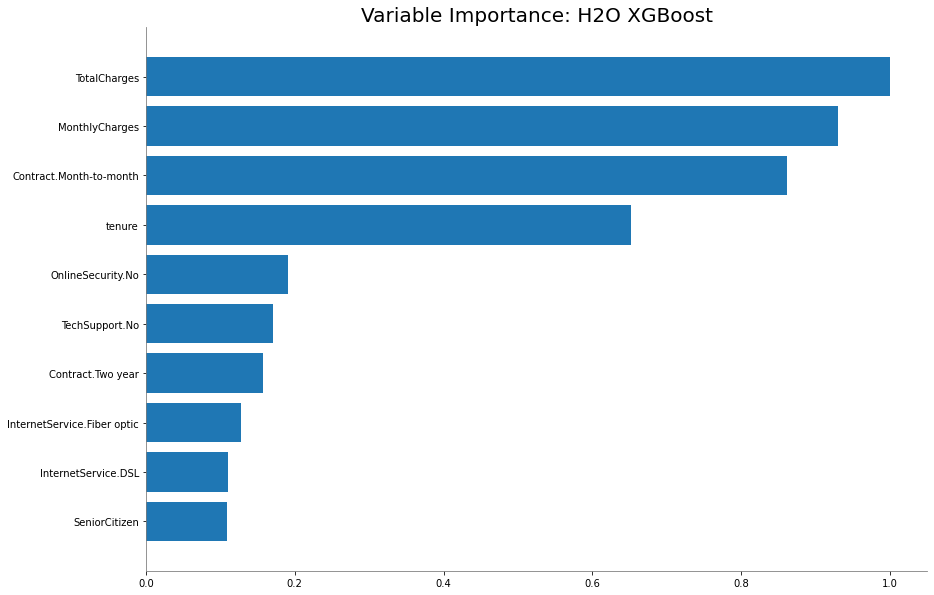

In [26]:
out.varimp_plot()

Сохраниение результатов в архив

In [27]:
aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_1_20211124_172125.zip'

**Использованная литература:**

https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f
https://www.rdocumentation.org/packages/h2o/versions/3.34.0.3/topics/h2o.automl

https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv

https://github.com/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb

#Ревью туториала
Рубан Александр Олегович (запуск удачный)